In [1]:
import os
import ast
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from csv import DictReader
from sklearn.metrics import ConfusionMatrixDisplay
from utils.helper_function import *

In [2]:
def convert_str_to_array(matrix_str):
    # Cleaning up the string to extract the matrix elements
    matrix_str_clean = matrix_str.replace("[[", "").replace("]]", "").replace("'", "").replace(" ", "")
    matrix_elements = matrix_str_clean.split(',')

    # Converting the elements into a 2x2 numpy array
    matrix = np.array(matrix_elements, dtype=int).reshape(2, 2)

    return matrix


# Path to the CSV file
def csv_to_dict(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)
    
    data_dict = df.to_dict(orient='list')

    return data_dict


def str_to_matrix(var_str):
    split_string = var_str.split('\n')
    matrix = []
    for row in split_string:
    # Remove unwanted characters and split by spaces
        row = row.replace('[', '').replace(']', '').strip().split()
        # Convert to integers and append to the matrix
        matrix.append([int(x) for x in row])

    # Convert to numpy array for better representation
    return np.array(matrix)
        


# Plot Confustion matrix
def plot_confusion_matrix(results, title):
    confusion_matrix = str_to_matrix(results["test_confusion_matrix"][-1])
    plt.figure(figsize=(8 ,6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Test confusion matrix of {title}")
    plt.ylabel("Predicted")
    plt.xlabel("Actual")
    plt.title(f"Test confusion matrix of {title}")

    plt.show()

In [3]:
directory_path  = "/Users/winirrr/Documents/EventBased_Project/results/exp_6"
directory_path_new = "/Users/winirrr/Documents/EventBased_Project/results/exp_11"
dv_df_11ms = csv_to_dict(os.path.join(directory_path_new,"dv_df_11ms_1.csv"))
dv_df_22ms = csv_to_dict(os.path.join(directory_path_new,"dv_df_22ms_1.csv"))
dv_df_33ms = csv_to_dict(os.path.join(directory_path_new,"dv_df_33ms_1.csv"))

dv_ts_11ms = csv_to_dict(os.path.join(directory_path,"dv_ts_11ms_1.csv"))
dv_ts_22ms = csv_to_dict(os.path.join(directory_path,"dv_ts_22ms_1.csv"))
dv_ts_33ms = csv_to_dict(os.path.join(directory_path,"dv_ts_33ms_1.csv"))

In [4]:
df_11 = create_file_label_dataframe("/Users/winirrr/Documents/EventBased_Project/datasets/dif_duration_dataset_1/11ms")

In [5]:
df_11.label.value_counts()

label
no_press    13060
press       10207
Name: count, dtype: int64

In [6]:
df_22 = create_file_label_dataframe("/Users/winirrr/Documents/EventBased_Project/datasets/dif_duration_dataset_1/22ms")

In [7]:
df_22.label.value_counts()

label
no_press    6528
press       5101
Name: count, dtype: int64

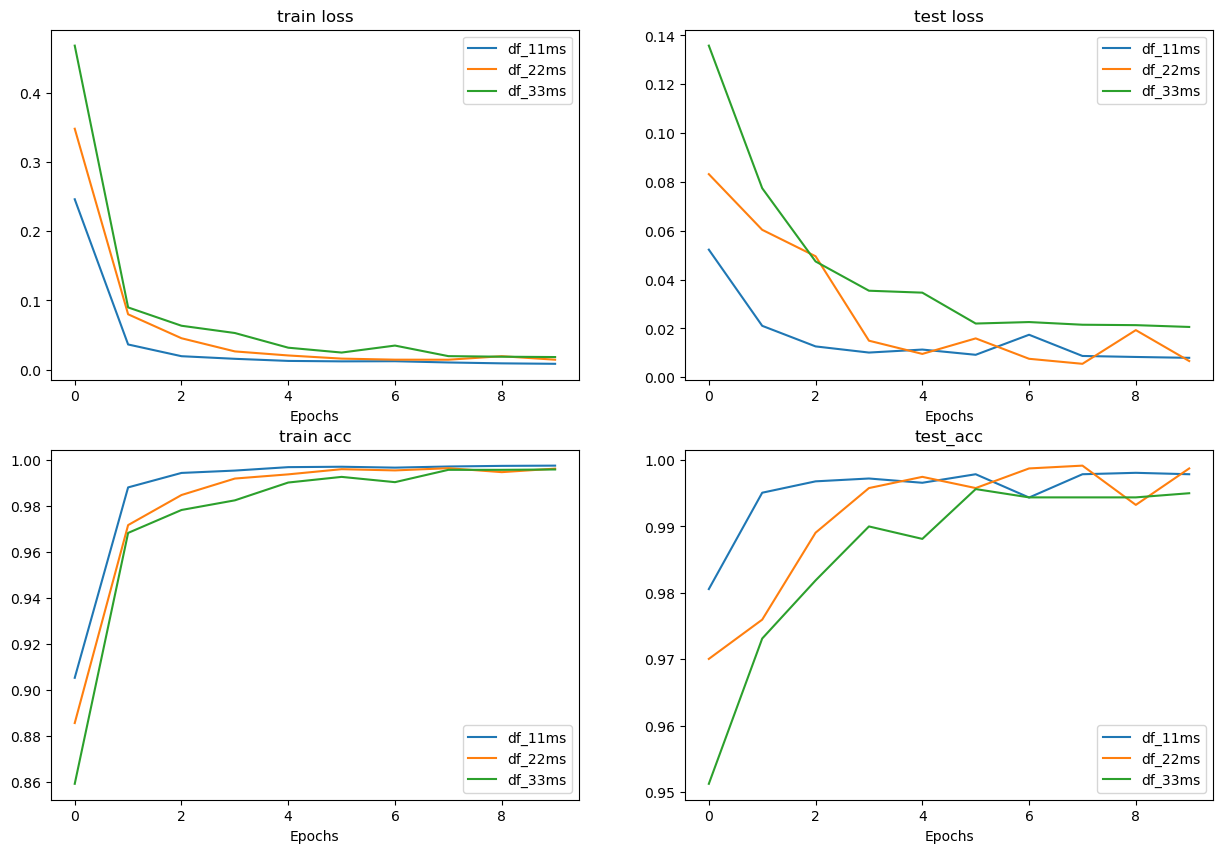

In [8]:
plt.figure(figsize=(15, 10))

epochs = range(len(dv_ts_11ms))

plt.subplot(2,2,1)
plt.plot(epochs, dv_df_11ms['train_loss'], label="df_11ms")
plt.plot(epochs, dv_df_22ms['train_loss'], label="df_22ms")
plt.plot(epochs, dv_df_33ms['train_loss'], label="df_33ms")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, dv_df_11ms['test_loss'], label="df_11ms")
plt.plot(epochs, dv_df_22ms['test_loss'], label="df_22ms")
plt.plot(epochs, dv_df_33ms['test_loss'], label="df_33ms")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, dv_df_11ms['train_acc'], label="df_11ms")
plt.plot(epochs, dv_df_22ms['train_acc'], label="df_22ms")
plt.plot(epochs, dv_df_33ms['train_acc'], label="df_33ms")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, dv_df_11ms['test_acc'], label="df_11ms")
plt.plot(epochs, dv_df_22ms['test_acc'], label="df_22ms")
plt.plot(epochs, dv_df_33ms['test_acc'], label="df_33ms")
plt.title("test_acc")
plt.xlabel("Epochs")
plt.legend()

plt.show()

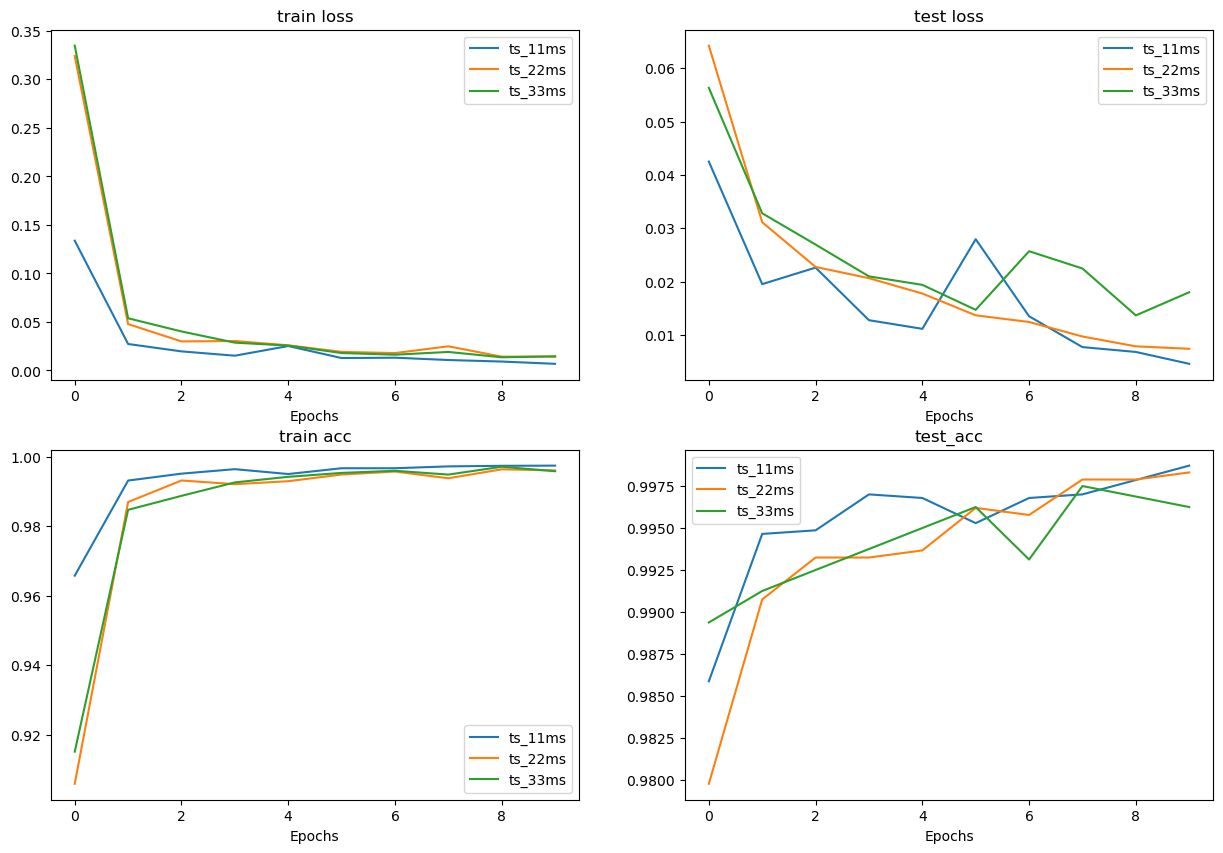

In [9]:
plt.figure(figsize=(15, 10))

epochs = range(len(dv_ts_11ms))

plt.subplot(2,2,1)
plt.plot(epochs, dv_ts_11ms['train_loss'], label="ts_11ms")
plt.plot(epochs, dv_ts_22ms['train_loss'], label="ts_22ms")
plt.plot(epochs, dv_ts_33ms['train_loss'], label="ts_33ms")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, dv_ts_11ms['test_loss'], label="ts_11ms")
plt.plot(epochs, dv_ts_22ms['test_loss'], label="ts_22ms")
plt.plot(epochs, dv_ts_33ms['test_loss'], label="ts_33ms")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, dv_ts_11ms['train_acc'], label="ts_11ms")
plt.plot(epochs, dv_ts_22ms['train_acc'], label="ts_22ms")
plt.plot(epochs, dv_ts_33ms['train_acc'], label="ts_33ms")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, dv_ts_11ms['test_acc'], label="ts_11ms")
plt.plot(epochs, dv_ts_22ms['test_acc'], label="ts_22ms")
plt.plot(epochs, dv_ts_33ms['test_acc'], label="ts_33ms")
plt.title("test_acc")
plt.xlabel("Epochs")
plt.legend()

plt.show()

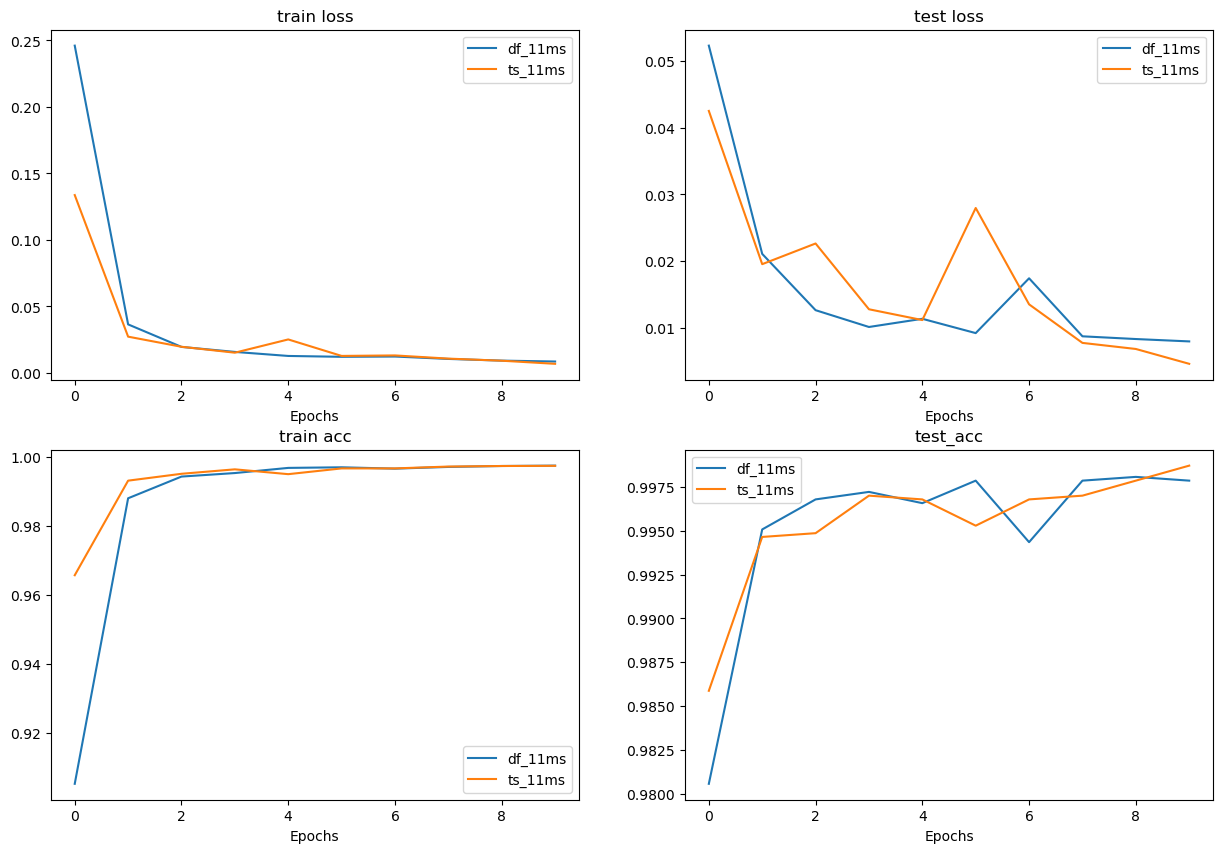

In [10]:
plt.figure(figsize=(15, 10))

epochs = range(len(dv_df_11ms))

plt.subplot(2,2,1)
plt.plot(epochs, dv_df_11ms['train_loss'], label="df_11ms")
plt.plot(epochs, dv_ts_11ms['train_loss'], label="ts_11ms")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, dv_df_11ms['test_loss'], label="df_11ms")
plt.plot(epochs, dv_ts_11ms['test_loss'], label="ts_11ms")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, dv_df_11ms['train_acc'], label="df_11ms")
plt.plot(epochs, dv_ts_11ms['train_acc'], label="ts_11ms")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, dv_df_11ms['test_acc'], label="df_11ms")
plt.plot(epochs, dv_ts_11ms['test_acc'], label="ts_11ms")
plt.title("test_acc")
plt.xlabel("Epochs")
plt.legend()


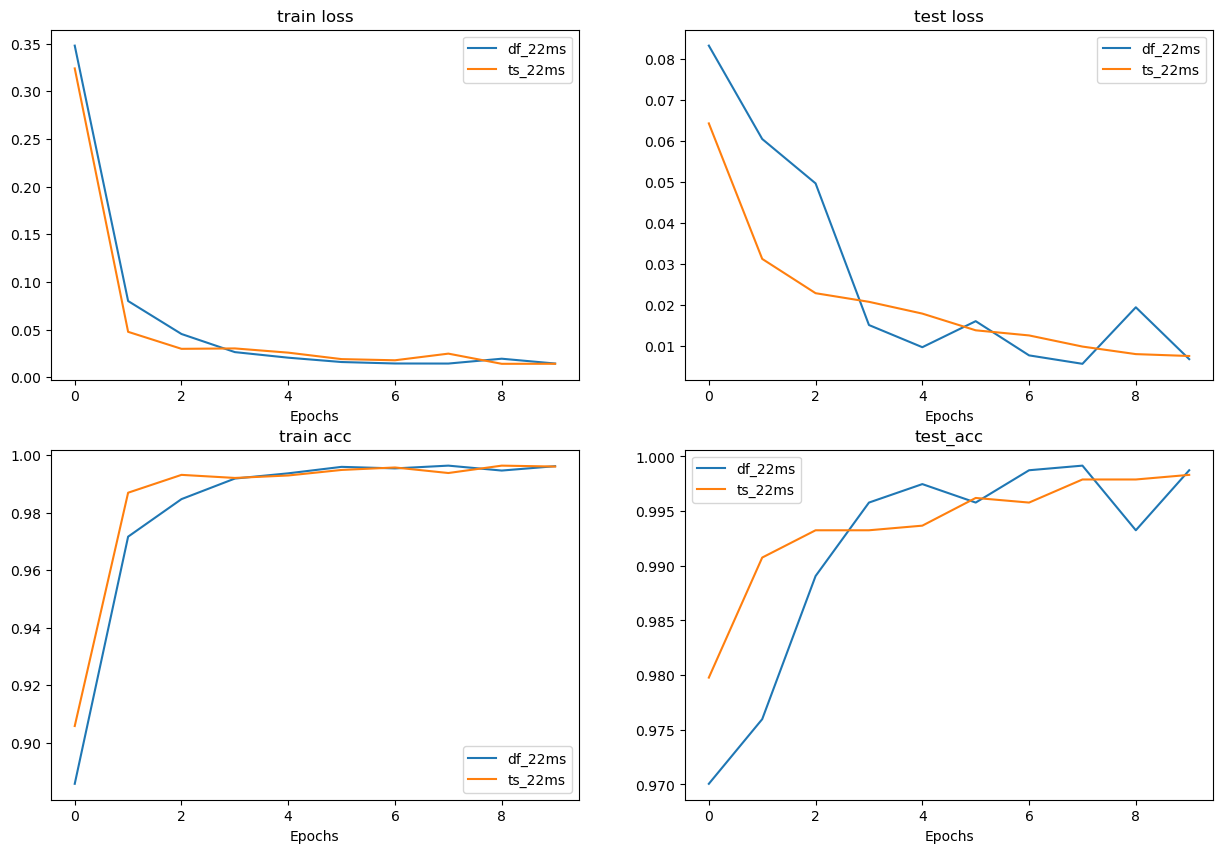

In [11]:
plt.figure(figsize=(15, 10))

epochs = range(len(dv_df_11ms))

plt.subplot(2,2,1)
plt.plot(epochs, dv_df_22ms['train_loss'], label="df_22ms")
plt.plot(epochs, dv_ts_22ms['train_loss'], label="ts_22ms")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, dv_df_22ms['test_loss'], label="df_22ms")
plt.plot(epochs, dv_ts_22ms['test_loss'], label="ts_22ms")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, dv_df_22ms['train_acc'], label="df_22ms")
plt.plot(epochs, dv_ts_22ms['train_acc'], label="ts_22ms")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, dv_df_22ms['test_acc'], label="df_22ms")
plt.plot(epochs, dv_ts_22ms['test_acc'], label="ts_22ms")
plt.title("test_acc")
plt.xlabel("Epochs")
plt.legend()

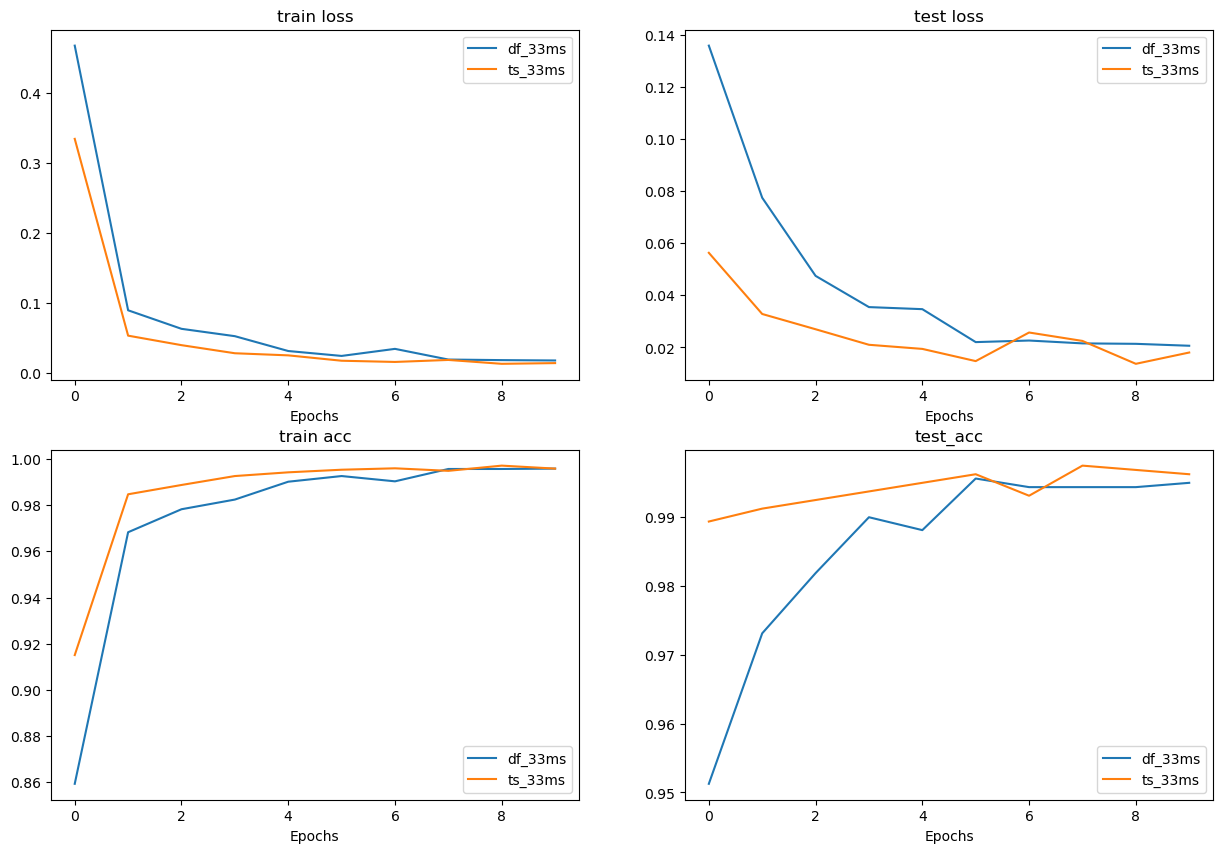

In [12]:
plt.figure(figsize=(15, 10))

epochs = range(len(dv_df_11ms))

plt.subplot(2,2,1)
plt.plot(epochs, dv_df_33ms['train_loss'], label="df_33ms")
plt.plot(epochs, dv_ts_33ms['train_loss'], label="ts_33ms")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, dv_df_33ms['test_loss'], label="df_33ms")
plt.plot(epochs, dv_ts_33ms['test_loss'], label="ts_33ms")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, dv_df_33ms['train_acc'], label="df_33ms")
plt.plot(epochs, dv_ts_33ms['train_acc'], label="ts_33ms")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, dv_df_33ms['test_acc'], label="df_33ms")
plt.plot(epochs, dv_ts_33ms['test_acc'], label="ts_33ms")
plt.title("test_acc")
plt.xlabel("Epochs")
plt.legend()

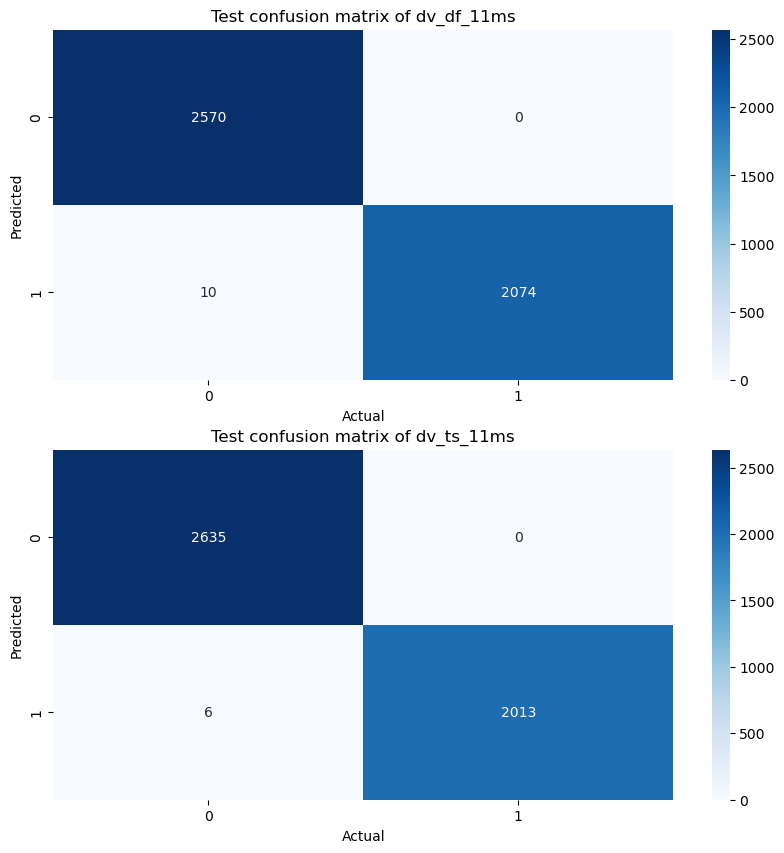

In [13]:
plt.figure(figsize=(10 ,10))

plt.subplot(2,1,1)
sns.heatmap(str_to_matrix(dv_df_11ms["test_confusion_matrix"][-1]), annot=True, fmt='d', cmap="Blues")
plt.title(f"Test confusion matrix of dv_df_11ms")
plt.ylabel("Predicted")
plt.xlabel("Actual")


plt.subplot(2,1,2)
sns.heatmap(str_to_matrix(dv_ts_11ms["test_confusion_matrix"][-1]), annot=True, fmt='d', cmap="Blues")
plt.title(f"Test confusion matrix of dv_ts_11ms")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

In [14]:
df_11_dv = create_file_label_dataframe("/Users/winirrr/Documents/EventBased_Project/datasets/dif_duration_dataset_1/11ms")
df_11_ts = create_file_label_dataframe("/Users/winirrr/Documents/EventBased_Project/datasets/dif_duration_dataset_2/11ms")

In [15]:
df_11_dv.label.value_counts()

label
no_press    13060
press       10207
Name: count, dtype: int64

In [16]:
df_11_ts.label.value_counts()


label
no_press    13060
press       10207
Name: count, dtype: int64

In [17]:
import os
import shutil
from sklearn.model_selection import train_test_split

def process_data_and_split(input_dir, output_dir, train_ratio=0.8):
    # Define the source and target directories
    press_dir = os.path.join(input_dir, 'press')
    no_press_dir = os.path.join(input_dir, 'no_press')
    train_press_dir = os.path.join(output_dir, 'train', 'press')
    test_press_dir = os.path.join(output_dir, 'test', 'press')
    train_no_press_dir = os.path.join(output_dir, 'train', 'no_press')
    test_no_press_dir = os.path.join(output_dir, 'test', 'no_press')

    # Create the target directories
    os.makedirs(train_press_dir, exist_ok=True)
    os.makedirs(test_press_dir, exist_ok=True)
    os.makedirs(train_no_press_dir, exist_ok=True)
    os.makedirs(test_no_press_dir, exist_ok=True)

    # Get list of all files in press and no_press directories
    press_files = [os.path.join(press_dir, f) for f in os.listdir(press_dir) if os.path.isfile(os.path.join(press_dir, f))]
    no_press_files = [os.path.join(no_press_dir, f) for f in os.listdir(no_press_dir) if os.path.isfile(os.path.join(no_press_dir, f))]

    # Split the data into train and test sets
    press_train, press_test = train_test_split(press_files, test_size=1-train_ratio, random_state=42)
    no_press_train, no_press_test = train_test_split(no_press_files, test_size=1-train_ratio, random_state=42)

    # Function to move files to the target directory
    def copy_files(files, target_dir):
        for file in files:
            shutil.copy(file, target_dir)

    # Copy the files to the respective directories
    copy_files(press_train, train_press_dir)
    copy_files(press_test, test_press_dir)
    copy_files(no_press_train, train_no_press_dir)
    copy_files(no_press_test, test_no_press_dir)

    print("Data processed and split successfully.")

# Input directory (source) and output directory (destination)
input_directory = '/Users/winirrr/Documents/EventBased_Project/datasets/dif_duration_dataset_1/11ms'
output_directory = '/Users/winirrr/Documents/EventBased_Project/datasets/processed_dif_duration_dataset_1/11ms'

# Process the data and split it into train and test sets
process_data_and_split(input_directory, output_directory)


Data processed and split successfully.
